## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## Data Preprocessing

We load the botted dataset 

In [3]:
tweets = pd.read_csv(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\tweets_sentiment_whole.csv', low_memory = False)

In [4]:
tweets = tweets.loc[:, ~tweets.columns.str.contains('^Unnamed')]

In [5]:
tweets

,ID,Text,UserName,UserFollowerCount,RetweetCount,Likes,CreatedAt,compound,score,FlooredDatatime
0,1.373226e+18,": ,000 has already been claimed! Join the air...",md.rubel,20.0,992.0,0.0,Sat Mar 20 10:51:56 +0000 2021,0.3595,7.139670e+03,2021-03-20 11:00:00
1,1.373226e+18,: The DEX is set to launch on the network wit...,Newborn99,215.0,3190.0,0.0,Sat Mar 20 10:51:56 +0000 2021,0.0000,0.000000e+00,2021-03-20 11:00:00
2,1.373226e+18,": ⚡,000 Giveaway⚡To celebrate 50k members on ...",Emak2 Korban Ikatan 💏,133.0,14774.0,0.0,Sat Mar 20 10:51:56 +0000 2021,0.5719,1.123826e+06,2021-03-20 11:00:00
3,1.373226e+18,🚀 is the only blockchain that can communicate ...,Shahriar,18.0,0.0,1.0,Sat Mar 20 10:51:56 +0000 2021,-0.3089,-1.112040e+01,2021-03-20 11:00:00
4,1.373226e+18,: I’m giving to one lucky follower that retw...,nanas🍍,128.0,1320.0,0.0,Sat Mar 20 10:51:56 +0000 2021,0.6369,1.076921e+05,2021-03-20 11:00:00
...,...,...,...,...,...,...,...,...,...,...
7024708,1.384521e+18,"Tue Apr :: (:)USD : ,.: ,: ,: 1,. : 3,: , (....",Block Watcher,909.0,0.0,0.0,Tue Apr 20 14:55:24 +0000 2021,0.0000,0.000000e+00,2021-04-20 15:00:00
7024709,1.384521e+18,: on Venmo for million users places more pr...,cjglory,525.0,1141.0,0.0,Tue Apr 20 14:55:24 +0000 2021,-0.3597,-2.156581e+05,2021-04-20 15:00:00
7024710,1.384521e+18,Bitcoin keeps getting rejected from many trend...,Crypto Bible,36798.0,0.0,0.0,Tue Apr 20 14:55:25 +0000 2021,-0.9226,-3.394983e+04,2021-04-20 15:00:00
7024711,1.384521e+18,* DIGITAL ASSET MGMT TO LIST BITCOIN FUND ON N...,sellvolbuytesla,603.0,0.0,0.0,Tue Apr 20 14:55:25 +0000 2021,0.3612,2.178036e+02,2021-04-20 15:00:00


In [6]:
hourly_sum = tweets.groupby(['FlooredDatatime']).sum()['score']

In [7]:
len(hourly_sum)

715

In [9]:
tweets['FlooredDatatime'].unique()

array(['2021-03-20 11:00:00', '2021-03-20 12:00:00',
       '2021-03-20 13:00:00', '2021-03-20 14:00:00',
       '2021-03-20 15:00:00', '2021-03-20 16:00:00',
       '2021-03-20 17:00:00', '2021-03-20 18:00:00',
       '2021-03-20 19:00:00', '2021-03-20 20:00:00',
       '2021-03-20 21:00:00', '2021-03-20 22:00:00',
       '2021-03-20 23:00:00', '2021-03-21 00:00:00',
       '2021-03-21 01:00:00', '2021-03-21 02:00:00',
       '2021-03-21 03:00:00', '2021-03-21 04:00:00',
       '2021-03-21 05:00:00', '2021-03-21 06:00:00',
       '2021-03-21 07:00:00', '2021-03-21 08:00:00',
       '2021-03-21 09:00:00', '2021-03-21 10:00:00',
       '2021-03-21 11:00:00', '2021-03-21 12:00:00',
       '2021-03-21 13:00:00', '2021-03-21 14:00:00',
       '2021-03-21 15:00:00', '2021-03-21 16:00:00',
       '2021-03-21 17:00:00', '2021-03-21 18:00:00',
       '2021-03-21 19:00:00', '2021-03-21 20:00:00',
       '2021-03-21 21:00:00', '2021-03-21 22:00:00',
       '2021-03-21 23:00:00', '2021-03-22 00:0

In [10]:
historical_data = pd.read_excel(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\Historical Price Data\BTC_Price_20_March_until_20_April.xlsx',header= 0)

In [11]:
len(historical_data)

2993

We try to achieve the allignment of both datasets together (historical_data and hourly_sum) so that they start from the same timestamp

In [12]:
for i in range(len(historical_data)):
    if historical_data['Timestamp'][i] == dt.datetime(2021, 4, 10, 9, 0):
        print(i)

2008


In [13]:
2008/4

502.0

In [14]:
for i in range(len(historical_data)):
    if historical_data['Timestamp'][i] == dt.datetime(2021, 4, 11, 20, 0):
        print(i)

2148


In [15]:
2148/4

537.0

In [16]:
hourly_price = []
for i in range(0,len(historical_data),4):
    hourly_price.append(historical_data['Close'][i])

Indexes of rows to exclude from the hourly price dataset

In [2]:
to_exclude = {503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536}

In [18]:
slided_hourly_price = [element for i, element in enumerate(hourly_price) if i not in to_exclude]

In [19]:
len(slided_hourly_price)

715

In [21]:
slided_hourly_price

[58688.1,
 59130.0,
 59480.0,
 58982.6,
 59570.0,
 58950.1,
 59110.0,
 59246.6,
 59259.4,
 58800.1,
 58643.6,
 58734.1,
 58400.0,
 58330.0,
 58420.8,
 58011.2,
 57685.3,
 57801.1,
 57083.2,
 57122.4,
 57328.3,
 57227.4,
 57185.3,
 56179.4,
 56008.4,
 56060.4,
 56700.7,
 57266.2,
 57484.4,
 57229.9,
 57157.6,
 57306.9,
 57680.0,
 57919.6,
 57760.2,
 57893.3,
 57237.8,
 57397.5,
 56637.0,
 56622.1,
 57265.9,
 57619.2,
 57541.5,
 57716.1,
 57611.9,
 57525.4,
 57200.9,
 58027.4,
 58014.3,
 57441.1,
 57327.9,
 57191.2,
 56968.6,
 57172.5,
 56724.9,
 56949.0,
 55925.9,
 55962.2,
 54948.6,
 54527.9,
 54725.5,
 54599.8,
 54663.1,
 54994.1,
 54562.7,
 54589.3,
 54111.0,
 53244.9,
 53619.8,
 54021.5,
 54377.6,
 54633.9,
 54640.0,
 55030.8,
 55248.8,
 55300.0,
 55074.7,
 54950.1,
 55650.6,
 55671.8,
 55465.5,
 54784.4,
 54422.4,
 54671.7,
 54677.5,
 54138.8,
 53949.5,
 54576.5,
 54323.3,
 54351.2,
 53967.8,
 53817.3,
 55463.6,
 55907.3,
 56631.4,
 56286.0,
 56414.0,
 56904.0,
 56880.0,
 56865.0,


## Correlation Graphs

In [22]:
#inspired by https://stackoverflow.com/questions/33171413/cross-correlation-time-lag-correlation-with-pandas
def crosscorr1(datax, datay, lag=0,method = 'pearson'):
    return datax.corr(datay.shift(lag),method)

In [23]:
df = pd.DataFrame({'price':slided_hourly_price,'score':hourly_sum })
df

,price,score
FlooredDatatime,,
2021-03-20 11:00:00,58688.1,3.020581e+09
2021-03-20 12:00:00,59130.0,2.030380e+10
2021-03-20 13:00:00,59480.0,1.605324e+10
2021-03-20 14:00:00,58982.6,-1.063602e+12
2021-03-20 15:00:00,59570.0,-2.185849e+10
...,...,...
2021-04-20 11:00:00,55999.9,1.099503e+11
2021-04-20 12:00:00,55894.2,1.463393e+11
2021-04-20 13:00:00,55952.0,-2.548214e+12


In [156]:
datax = df['price']
datay = df['score']

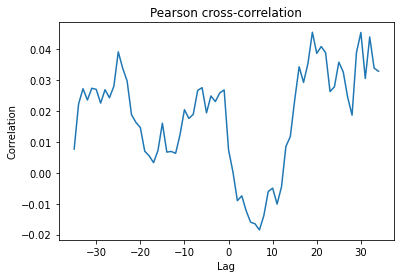

In [165]:
xpears = [crosscorr1(datax, datay, lag=i,method = 'pearson') for i in range(-35,35)]
plt.plot(range(-35,35), xpears)
plt.title("Pearson cross-correlation")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

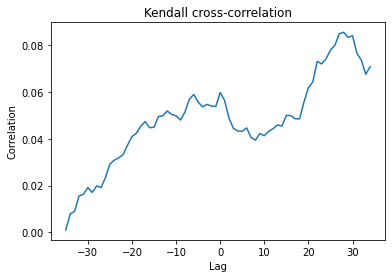

In [167]:
xkend = [crosscorr1(datax, datay, lag=i,method = 'kendall') for i in range(-35,35)]
plt.plot(range(-35,35), xkend)
plt.title("Kendall cross-correlation")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

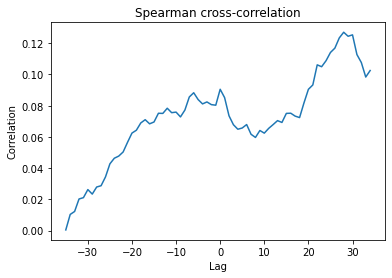

In [168]:
xspear = [crosscorr1(datax, datay, lag=i,method = 'spearman') for i in range(-35,35)]
plt.plot(range(-35,35), xspear)
plt.title("Spearman cross-correlation")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

In [169]:
#Normalise the data
normalised_score = df['score'] / max(df['score'].max(),abs(df['score'].min()))

In [170]:
normalised_price = df['price'] / max(df['price'].max(),abs(df['price'].min()))

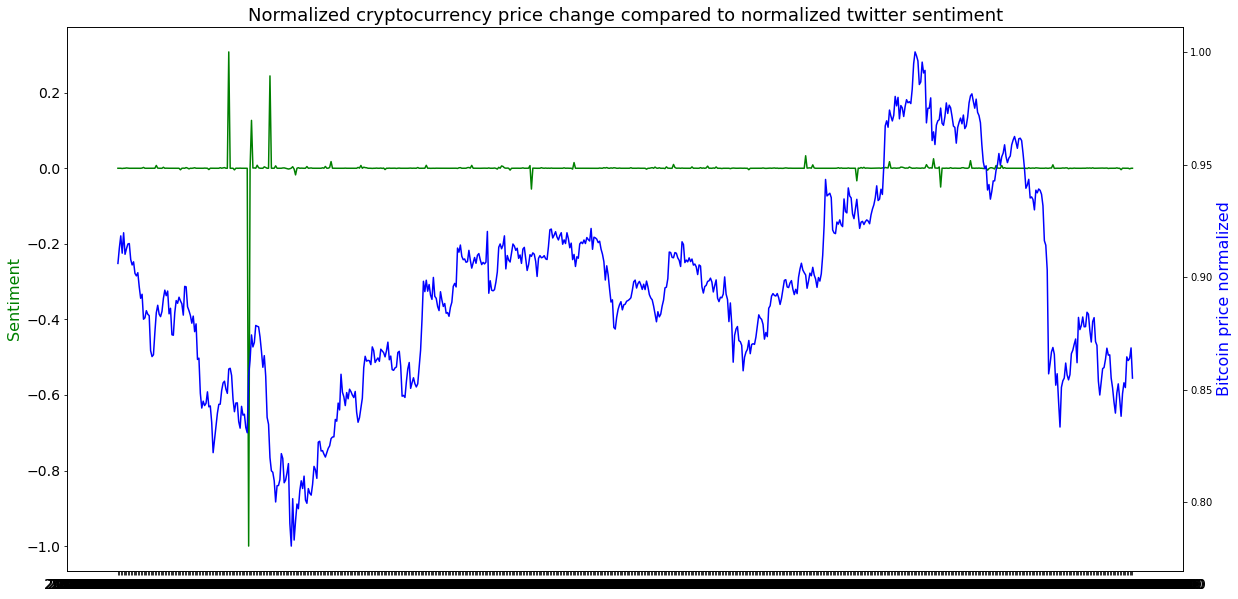

In [171]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Normalized cryptocurrency price change compared to normalized twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(normalised_score.index, normalised_score, 'g-')
ax2.plot_date(normalised_price.index, normalised_price, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin price normalized", color='b', fontsize=16)
plt.show()


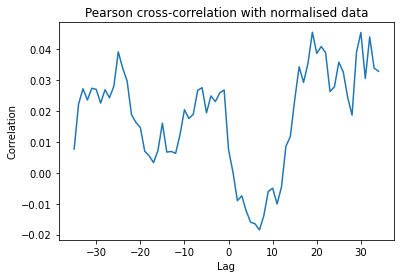

In [173]:
xpears = [crosscorr1(normalised_price, normalised_score, lag=i,method = 'pearson') for i in range(-35,35)]
plt.plot(range(-35,35), xpears)
plt.title("Pearson cross-correlation with normalised data")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

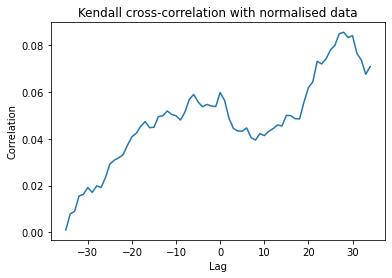

In [174]:
xkend = [crosscorr1(normalised_price, normalised_score, lag=i,method = 'kendall') for i in range(-35,35)]
plt.plot(range(-35,35), xkend)
plt.title("Kendall cross-correlation with normalised data")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

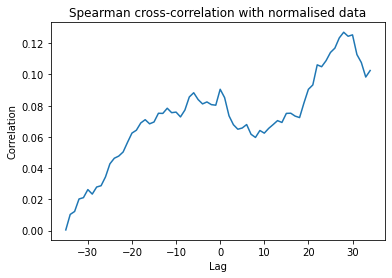

In [175]:
xspear = [crosscorr1(normalised_price, normalised_score, lag=i,method = 'spearman') for i in range(-35,35)]
plt.plot(range(-35,35), xspear)
plt.title("Spearman cross-correlation with normalised data")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

## Derivative

In [176]:
score_derivative = pd.Series(np.gradient(normalised_score), normalised_score.index, name='slope')
price_derivative = pd.Series(np.gradient(normalised_price), normalised_price.index, name='slope')

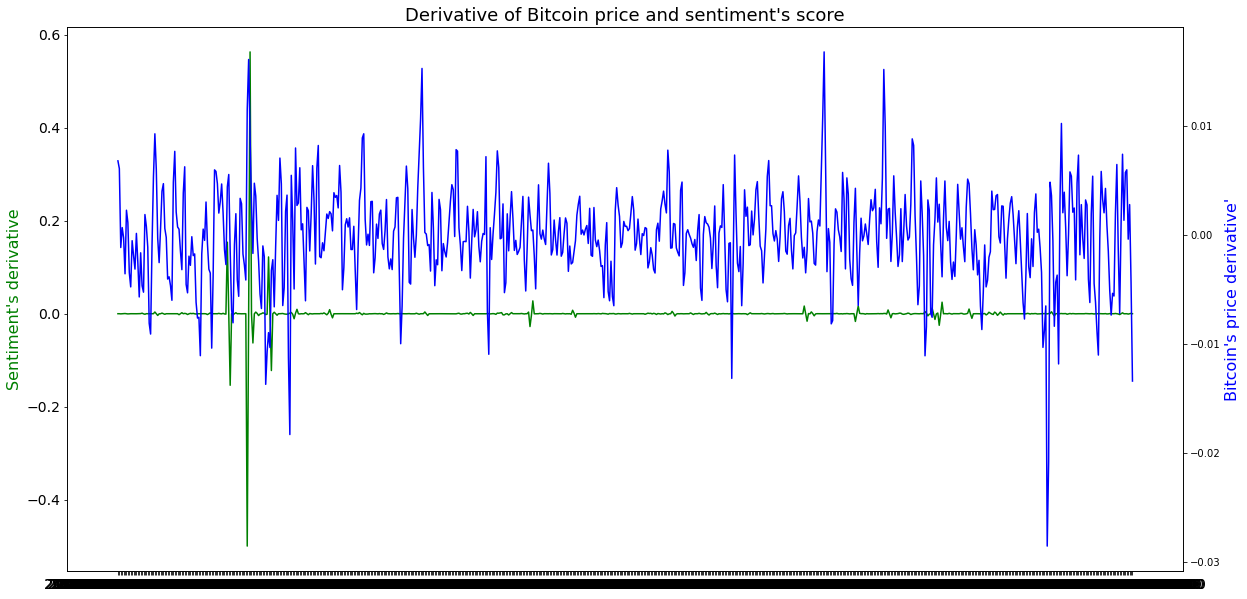

In [177]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Derivative of Bitcoin price and sentiment's score", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(score_derivative.index, score_derivative, 'g-')
ax2.plot_date(price_derivative.index, price_derivative, 'b-')

ax1.set_ylabel("Sentiment's derivative", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin's price derivative'", color='b', fontsize=16)
plt.show()


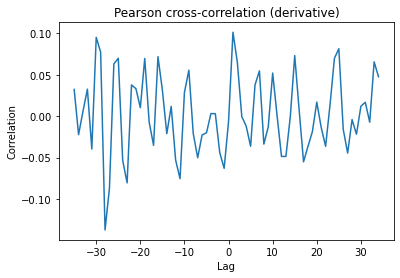

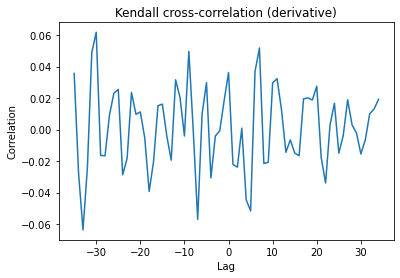

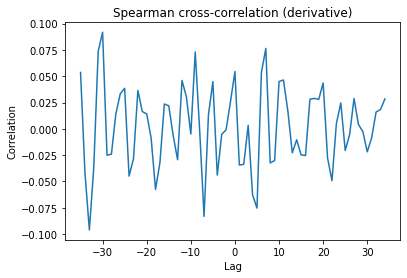

In [178]:
xpear = [crosscorr1(score_derivative, price_derivative, lag=i, method="pearson") for i in range(-35,35)]
plt.plot(range(-35,35), xpear)
plt.title("Pearson cross-correlation (derivative)")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

xkend = [crosscorr1(score_derivative, price_derivative, lag=i, method="kendall") for i in range(-35,35)]
plt.plot(range(-35,35), xkend)
plt.title("Kendall cross-correlation (derivative)")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

xspear = [crosscorr1(score_derivative, price_derivative, lag=i, method="spearman") for i in range(-35,35)]
plt.plot(range(-35,35), xspear)
plt.title("Spearman cross-correlation (derivative)")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()


## Non-botted Dataset

We do the same process for the non botted dataset

In [179]:
tweets_not_botted = pd.read_csv(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\non_botted_tweets_sentiment_final.csv', low_memory = False)

In [181]:
tweets_not_botted = tweets_not_botted.loc[:, ~tweets_not_botted.columns.str.contains('^Unnamed')]
tweets_not_botted

,UserName,CreatedAt,ID,Text,UserFollowerCount,RetweetCount,Likes,compound,score
0,Newborn99,Sat Mar 20 10:51:56 +0000 2021,1.373226e+18,: The DEX is set to launch on the network wit...,215.0,3190.0,0.0,0.0000,0.0000
1,Shahriar,Sat Mar 20 10:51:56 +0000 2021,1.373226e+18,🚀 is the only blockchain that can communicate ...,18.0,0.0,1.0,-0.3089,-11.1204
2,Common sense...,Sat Mar 20 10:51:57 +0000 2021,1.373226e+18,"People, hear me... Cheap blockchain stock is t...",24.0,0.0,0.0,0.1779,4.2696
3,SimplyVickson💞💕💖,Sat Mar 20 10:51:58 +0000 2021,1.373226e+18,: I'll send in #ETH or #BTC to one person wh...,140.0,1044.0,0.0,0.0000,0.0000
4,Febrio Pujiana,Sat Mar 20 10:51:58 +0000 2021,1.373226e+18,: We added information to the website URL ava...,154.0,553.0,0.0,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...
5790685,Block Watcher,Tue Apr 20 14:55:24 +0000 2021,1.384521e+18,"Tue Apr :: (:)USD : ,.: ,: ,: 1,. : 3,: , (....",909.0,0.0,0.0,0.0000,0.0000
5790686,cjglory,Tue Apr 20 14:55:24 +0000 2021,1.384521e+18,: on Venmo for million users places more pr...,525.0,1141.0,0.0,-0.3597,-215658.1350
5790687,Crypto Bible,Tue Apr 20 14:55:25 +0000 2021,1.384521e+18,Bitcoin keeps getting rejected from many trend...,36798.0,0.0,0.0,-0.9226,-33949.8348
5790688,sellvolbuytesla,Tue Apr 20 14:55:25 +0000 2021,1.384521e+18,* DIGITAL ASSET MGMT TO LIST BITCOIN FUND ON N...,603.0,0.0,0.0,0.3612,217.8036


In [222]:
tweets_with_bots = pd.read_csv(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\tweets_sentiment_whole.csv', low_memory = False)

In [223]:
tweets_with_bots = tweets_with_bots.loc[:, ~tweets_with_bots.columns.str.contains('^Unnamed')]
tweets_with_bots

,ID,Text,UserName,UserFollowerCount,RetweetCount,Likes,CreatedAt,compound,score,FlooredDatatime
0,1.373226e+18,": ,000 has already been claimed! Join the air...",md.rubel,20.0,992.0,0.0,Sat Mar 20 10:51:56 +0000 2021,0.3595,7.139670e+03,2021-03-20 11:00:00
1,1.373226e+18,: The DEX is set to launch on the network wit...,Newborn99,215.0,3190.0,0.0,Sat Mar 20 10:51:56 +0000 2021,0.0000,0.000000e+00,2021-03-20 11:00:00
2,1.373226e+18,": ⚡,000 Giveaway⚡To celebrate 50k members on ...",Emak2 Korban Ikatan 💏,133.0,14774.0,0.0,Sat Mar 20 10:51:56 +0000 2021,0.5719,1.123826e+06,2021-03-20 11:00:00
3,1.373226e+18,🚀 is the only blockchain that can communicate ...,Shahriar,18.0,0.0,1.0,Sat Mar 20 10:51:56 +0000 2021,-0.3089,-1.112040e+01,2021-03-20 11:00:00
4,1.373226e+18,: I’m giving to one lucky follower that retw...,nanas🍍,128.0,1320.0,0.0,Sat Mar 20 10:51:56 +0000 2021,0.6369,1.076921e+05,2021-03-20 11:00:00
...,...,...,...,...,...,...,...,...,...,...
7024708,1.384521e+18,"Tue Apr :: (:)USD : ,.: ,: ,: 1,. : 3,: , (....",Block Watcher,909.0,0.0,0.0,Tue Apr 20 14:55:24 +0000 2021,0.0000,0.000000e+00,2021-04-20 15:00:00
7024709,1.384521e+18,: on Venmo for million users places more pr...,cjglory,525.0,1141.0,0.0,Tue Apr 20 14:55:24 +0000 2021,-0.3597,-2.156581e+05,2021-04-20 15:00:00
7024710,1.384521e+18,Bitcoin keeps getting rejected from many trend...,Crypto Bible,36798.0,0.0,0.0,Tue Apr 20 14:55:25 +0000 2021,-0.9226,-3.394983e+04,2021-04-20 15:00:00
7024711,1.384521e+18,* DIGITAL ASSET MGMT TO LIST BITCOIN FUND ON N...,sellvolbuytesla,603.0,0.0,0.0,Tue Apr 20 14:55:25 +0000 2021,0.3612,2.178036e+02,2021-04-20 15:00:00


In [224]:
tweets_not_botted_floored = tweets_not_botted.merge(tweets_with_bots, left_on=["UserName", "CreatedAt"], right_on=["UserName","CreatedAt"])

In [225]:
tweets_not_botted_floored = tweets_not_botted_floored.drop_duplicates('ID_x')

In [226]:
tweets_not_botted_floored = tweets_not_botted_floored.drop(['ID_x','Text_x','UserFollowerCount_x','RetweetCount_x','Likes_x','compound_x','score_x'],axis = 1)

In [227]:
tweets_not_botted_floored = tweets_not_botted_floored.rename(columns={'ID_y': 'ID', 'Text_y': 'Text','UserFollowerCount_y':'UserFollowerCount','RetweetCount_y':'RetweetCount','Likes_y':'Likes','compound_y':'compound','score_y':'score'})

In [228]:
tweets_not_botted_floored

,UserName,CreatedAt,ID,Text,UserFollowerCount,RetweetCount,Likes,compound,score,FlooredDatatime
0,Newborn99,Sat Mar 20 10:51:56 +0000 2021,1.373226e+18,: The DEX is set to launch on the network wit...,215.0,3190.0,0.0,0.0000,0.0000,2021-03-20 11:00:00
1,Shahriar,Sat Mar 20 10:51:56 +0000 2021,1.373226e+18,🚀 is the only blockchain that can communicate ...,18.0,0.0,1.0,-0.3089,-11.1204,2021-03-20 11:00:00
2,Common sense...,Sat Mar 20 10:51:57 +0000 2021,1.373226e+18,"People, hear me... Cheap blockchain stock is t...",24.0,0.0,0.0,0.1779,4.2696,2021-03-20 11:00:00
3,SimplyVickson💞💕💖,Sat Mar 20 10:51:58 +0000 2021,1.373226e+18,: I'll send in #ETH or #BTC to one person wh...,140.0,1044.0,0.0,0.0000,0.0000,2021-03-20 11:00:00
4,Febrio Pujiana,Sat Mar 20 10:51:58 +0000 2021,1.373226e+18,: We added information to the website URL ava...,154.0,553.0,0.0,0.0000,0.0000,2021-03-20 11:00:00
...,...,...,...,...,...,...,...,...,...,...
6100577,Block Watcher,Tue Apr 20 14:55:24 +0000 2021,1.384521e+18,"Tue Apr :: (:)USD : ,.: ,: ,: 1,. : 3,: , (....",909.0,0.0,0.0,0.0000,0.0000,2021-04-20 15:00:00
6100578,cjglory,Tue Apr 20 14:55:24 +0000 2021,1.384521e+18,: on Venmo for million users places more pr...,525.0,1141.0,0.0,-0.3597,-215658.1350,2021-04-20 15:00:00
6100579,Crypto Bible,Tue Apr 20 14:55:25 +0000 2021,1.384521e+18,Bitcoin keeps getting rejected from many trend...,36798.0,0.0,0.0,-0.9226,-33949.8348,2021-04-20 15:00:00
6100580,sellvolbuytesla,Tue Apr 20 14:55:25 +0000 2021,1.384521e+18,* DIGITAL ASSET MGMT TO LIST BITCOIN FUND ON N...,603.0,0.0,0.0,0.3612,217.8036,2021-04-20 15:00:00


In [229]:
tweets_not_botted_floored.to_csv(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\twitter\Results tweets\tweets_not_botted_preprocessed_final_floored.csv')

In [230]:
non_botted_hourly_sum = tweets_not_botted_floored.groupby(['FlooredDatatime']).sum()['score']

In [231]:
len(non_botted_hourly_sum)

712

In [232]:
tweets_not_botted_floored['FlooredDatatime'].unique()

array(['2021-03-20 11:00:00', '2021-03-20 12:00:00',
       '2021-03-20 13:00:00', '2021-03-20 14:00:00',
       '2021-03-20 15:00:00', '2021-03-20 16:00:00',
       '2021-03-20 17:00:00', '2021-03-20 18:00:00',
       '2021-03-20 19:00:00', '2021-03-20 20:00:00',
       '2021-03-20 21:00:00', '2021-03-20 22:00:00',
       '2021-03-20 23:00:00', '2021-03-21 00:00:00',
       '2021-03-21 01:00:00', '2021-03-21 02:00:00',
       '2021-03-21 03:00:00', '2021-03-21 04:00:00',
       '2021-03-21 05:00:00', '2021-03-21 06:00:00',
       '2021-03-21 07:00:00', '2021-03-21 08:00:00',
       '2021-03-21 09:00:00', '2021-03-21 10:00:00',
       '2021-03-21 11:00:00', '2021-03-21 12:00:00',
       '2021-03-21 13:00:00', '2021-03-21 14:00:00',
       '2021-03-21 15:00:00', '2021-03-21 16:00:00',
       '2021-03-21 17:00:00', '2021-03-21 18:00:00',
       '2021-03-21 19:00:00', '2021-03-21 20:00:00',
       '2021-03-21 21:00:00', '2021-03-21 22:00:00',
       '2021-03-21 23:00:00', '2021-03-22 00:0

In [233]:
# is missing: '2021-04-17 03:00:00','2021-04-17 07:00:00','2021-04-17 09:00:00' and '2021-04-10 10:00:00' to '2021-04-11 19:00:00',,

In [234]:
#for the allignment of each dataset (historical_data and hourly_sum)
for i in range(len(historical_data)):
    if historical_data['Timestamp'][i] == dt.datetime(2021, 4, 17, 3, 0):
        print(i)

2656


In [235]:
2656/4

664.0

In [236]:
for i in range(len(historical_data)):
    if historical_data['Timestamp'][i] == dt.datetime(2021, 4, 17, 7, 0):
        print(i)

2672


In [237]:
2672/4

668.0

In [238]:
for i in range(len(historical_data)):
    if historical_data['Timestamp'][i] == dt.datetime(2021, 4, 17, 9, 0):
        print(i)

2680


In [239]:
2680/4

670.0

In [240]:
non_botted_hourly_price = []
for i in range(0,len(historical_data),4):
    non_botted_hourly_price.append(historical_data['Close'][i])

In [241]:
to_exclude = {503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,664,668,670}

In [242]:
non_botted_slided_hourly_price = [element for i, element in enumerate(non_botted_hourly_price) if i not in to_exclude]

In [243]:
len(non_botted_slided_hourly_price)

712

In [244]:
non_botted_slided_hourly_price

[58688.1,
 59130.0,
 59480.0,
 58982.6,
 59570.0,
 58950.1,
 59110.0,
 59246.6,
 59259.4,
 58800.1,
 58643.6,
 58734.1,
 58400.0,
 58330.0,
 58420.8,
 58011.2,
 57685.3,
 57801.1,
 57083.2,
 57122.4,
 57328.3,
 57227.4,
 57185.3,
 56179.4,
 56008.4,
 56060.4,
 56700.7,
 57266.2,
 57484.4,
 57229.9,
 57157.6,
 57306.9,
 57680.0,
 57919.6,
 57760.2,
 57893.3,
 57237.8,
 57397.5,
 56637.0,
 56622.1,
 57265.9,
 57619.2,
 57541.5,
 57716.1,
 57611.9,
 57525.4,
 57200.9,
 58027.4,
 58014.3,
 57441.1,
 57327.9,
 57191.2,
 56968.6,
 57172.5,
 56724.9,
 56949.0,
 55925.9,
 55962.2,
 54948.6,
 54527.9,
 54725.5,
 54599.8,
 54663.1,
 54994.1,
 54562.7,
 54589.3,
 54111.0,
 53244.9,
 53619.8,
 54021.5,
 54377.6,
 54633.9,
 54640.0,
 55030.8,
 55248.8,
 55300.0,
 55074.7,
 54950.1,
 55650.6,
 55671.8,
 55465.5,
 54784.4,
 54422.4,
 54671.7,
 54677.5,
 54138.8,
 53949.5,
 54576.5,
 54323.3,
 54351.2,
 53967.8,
 53817.3,
 55463.6,
 55907.3,
 56631.4,
 56286.0,
 56414.0,
 56904.0,
 56880.0,
 56865.0,


In [245]:
non_botted_df = pd.DataFrame({'price':non_botted_slided_hourly_price,'score':non_botted_hourly_sum })
non_botted_df

,price,score
FlooredDatatime,,
2021-03-20 11:00:00,58688.1,2.357152e+09
2021-03-20 12:00:00,59130.0,1.909248e+10
2021-03-20 13:00:00,59480.0,1.566322e+10
2021-03-20 14:00:00,58982.6,-1.086174e+12
2021-03-20 15:00:00,59570.0,-7.144826e+10
...,...,...
2021-04-20 11:00:00,55999.9,1.096064e+11
2021-04-20 12:00:00,55894.2,1.457567e+11
2021-04-20 13:00:00,55952.0,-2.548552e+12


In [246]:
non_botted_datax = non_botted_df['price']
non_botted_datay = non_botted_df['score']

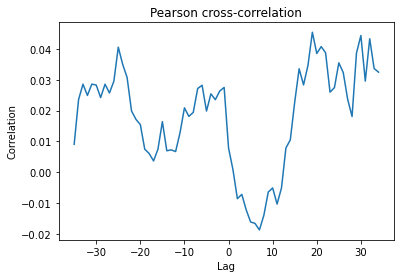

In [247]:
non_botted_xpears = [crosscorr1(non_botted_datax, non_botted_datay, lag=i,method = 'pearson') for i in range(-35,35)]
plt.plot(range(-35,35), non_botted_xpears)
plt.title("Pearson cross-correlation")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

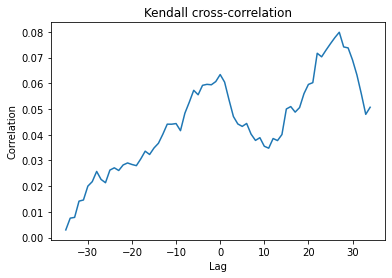

In [248]:
non_botted_xkend = [crosscorr1(non_botted_datax, non_botted_datay, lag=i,method = 'kendall') for i in range(-35,35)]
plt.plot(range(-35,35), non_botted_xkend)
plt.title("Kendall cross-correlation")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

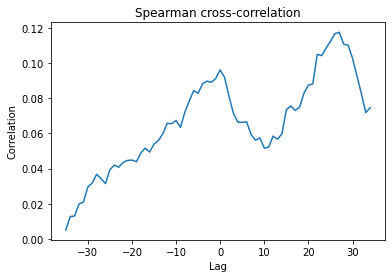

In [249]:
non_botted_xspear = [crosscorr1(non_botted_datax, non_botted_datay, lag=i,method = 'spearman') for i in range(-35,35)]
plt.plot(range(-35,35), non_botted_xspear)
plt.title("Spearman cross-correlation")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

In [250]:
non_botted_normalised_score = non_botted_df['score'] / max(non_botted_df['score'].max(),abs(non_botted_df['score'].min()))
non_botted_normalised_price = non_botted_df['price'] / max(non_botted_df['price'].max(),abs(non_botted_df['price'].min()))

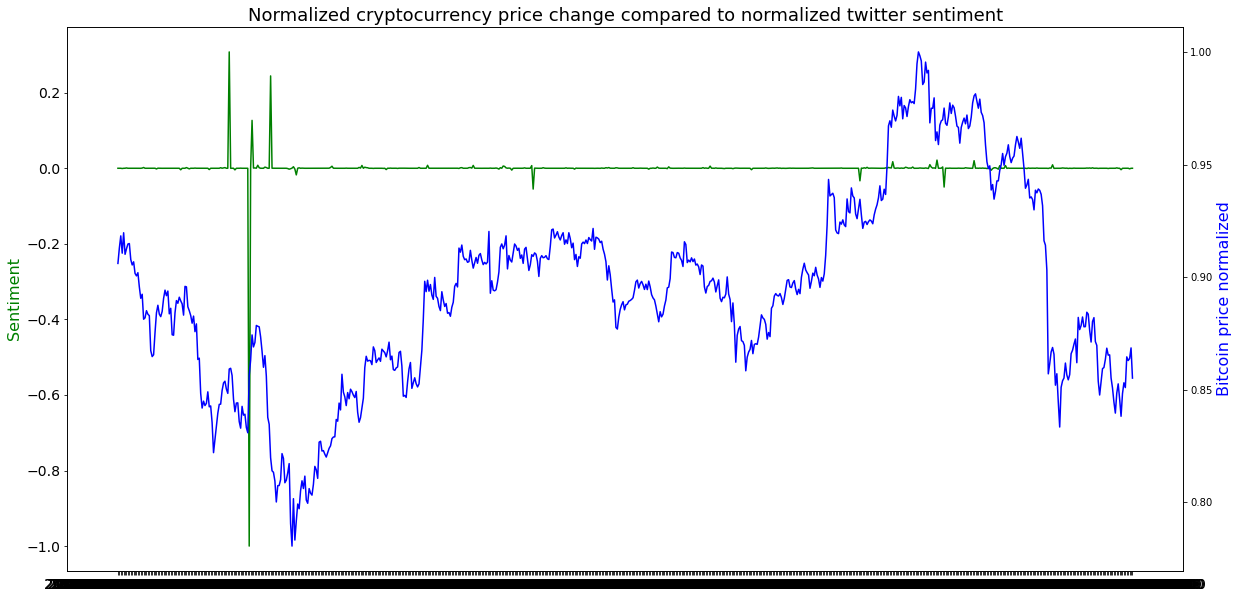

In [252]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Normalized cryptocurrency price change compared to normalized twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(non_botted_normalised_score.index, non_botted_normalised_score, 'g-')
ax2.plot_date(non_botted_normalised_price.index, non_botted_normalised_price, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin price normalized", color='b', fontsize=16)
plt.show()

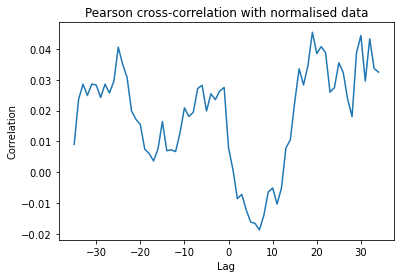

In [253]:
xpears = [crosscorr1(non_botted_normalised_price, non_botted_normalised_score, lag=i,method = 'pearson') for i in range(-35,35)]
plt.plot(range(-35,35), xpears)
plt.title("Pearson cross-correlation with normalised data")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

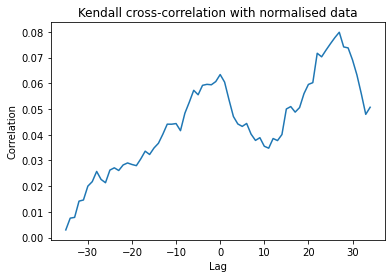

In [254]:
xkend = [crosscorr1(non_botted_normalised_price, non_botted_normalised_score, lag=i,method = 'kendall') for i in range(-35,35)]
plt.plot(range(-35,35), xkend)
plt.title("Kendall cross-correlation with normalised data")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

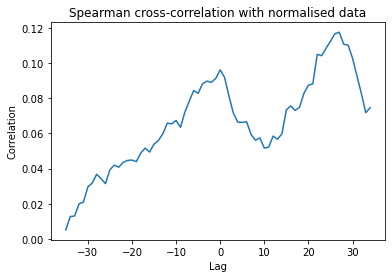

In [255]:
xspear = [crosscorr1(non_botted_normalised_price, non_botted_normalised_score, lag=i,method = 'spearman') for i in range(-35,35)]
plt.plot(range(-35,35), xspear)
plt.title("Spearman cross-correlation with normalised data")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

In [256]:
non_botted_score_derivative = pd.Series(np.gradient(non_botted_normalised_score), non_botted_normalised_score.index, name='slope')
non_botted_price_derivative = pd.Series(np.gradient(non_botted_normalised_price), non_botted_normalised_price.index, name='slope')

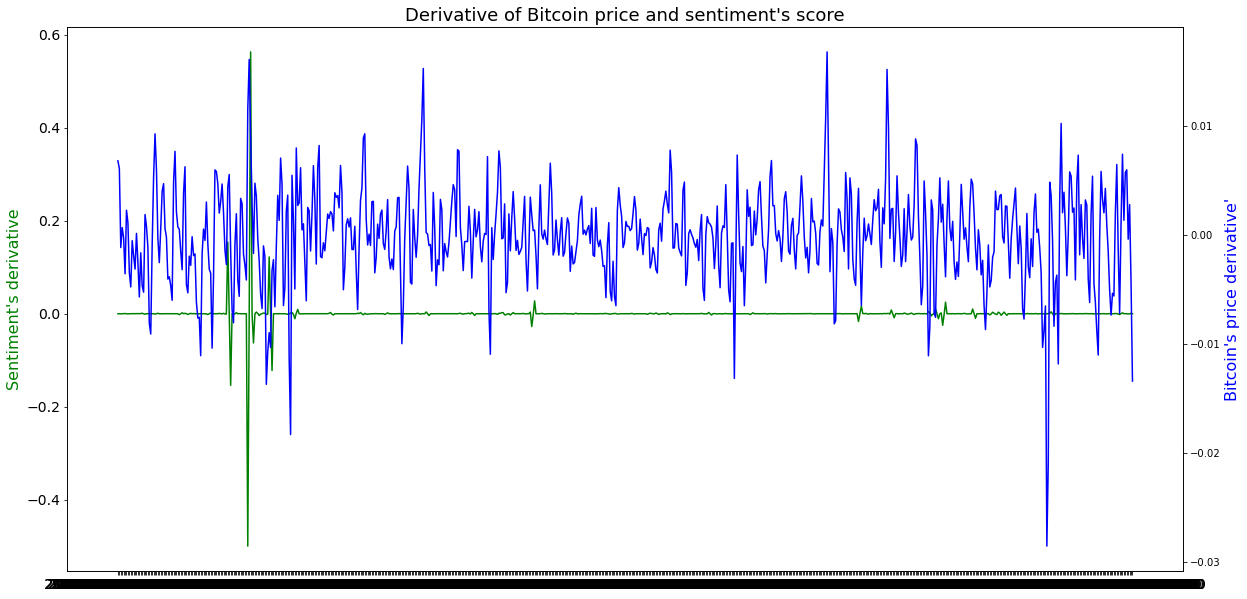

In [257]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Derivative of Bitcoin price and sentiment's score", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(non_botted_score_derivative.index, non_botted_score_derivative, 'g-')
ax2.plot_date(non_botted_price_derivative.index, non_botted_price_derivative, 'b-')

ax1.set_ylabel("Sentiment's derivative", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin's price derivative'", color='b', fontsize=16)
plt.show()


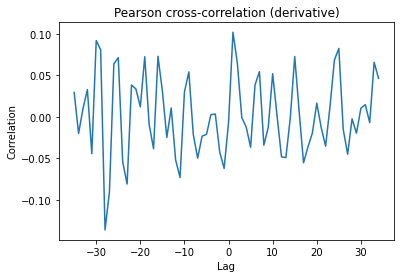

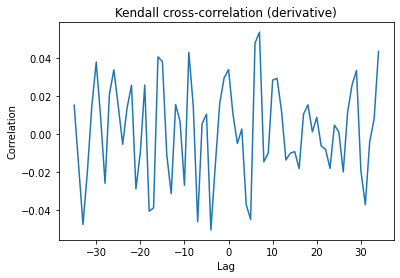

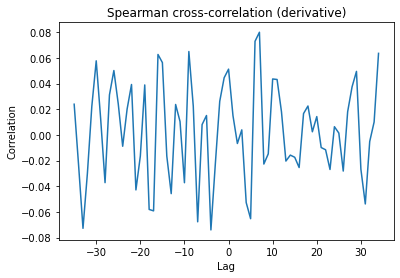

In [258]:
xpear = [crosscorr1(non_botted_score_derivative, non_botted_price_derivative, lag=i, method="pearson") for i in range(-35,35)]
plt.plot(range(-35,35), xpear)
plt.title("Pearson cross-correlation (derivative)")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

xkend = [crosscorr1(non_botted_score_derivative, non_botted_price_derivative, lag=i, method="kendall") for i in range(-35,35)]
plt.plot(range(-35,35), xkend)
plt.title("Kendall cross-correlation (derivative)")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

xspear = [crosscorr1(non_botted_score_derivative, non_botted_price_derivative, lag=i, method="spearman") for i in range(-35,35)]
plt.plot(range(-35,35), xspear)
plt.title("Spearman cross-correlation (derivative)")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()